<a href="https://colab.research.google.com/github/TosinGeorge/Data-Science-Projects/blob/main/Exploring_Hacker_News_Post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploring Hacker News Post**

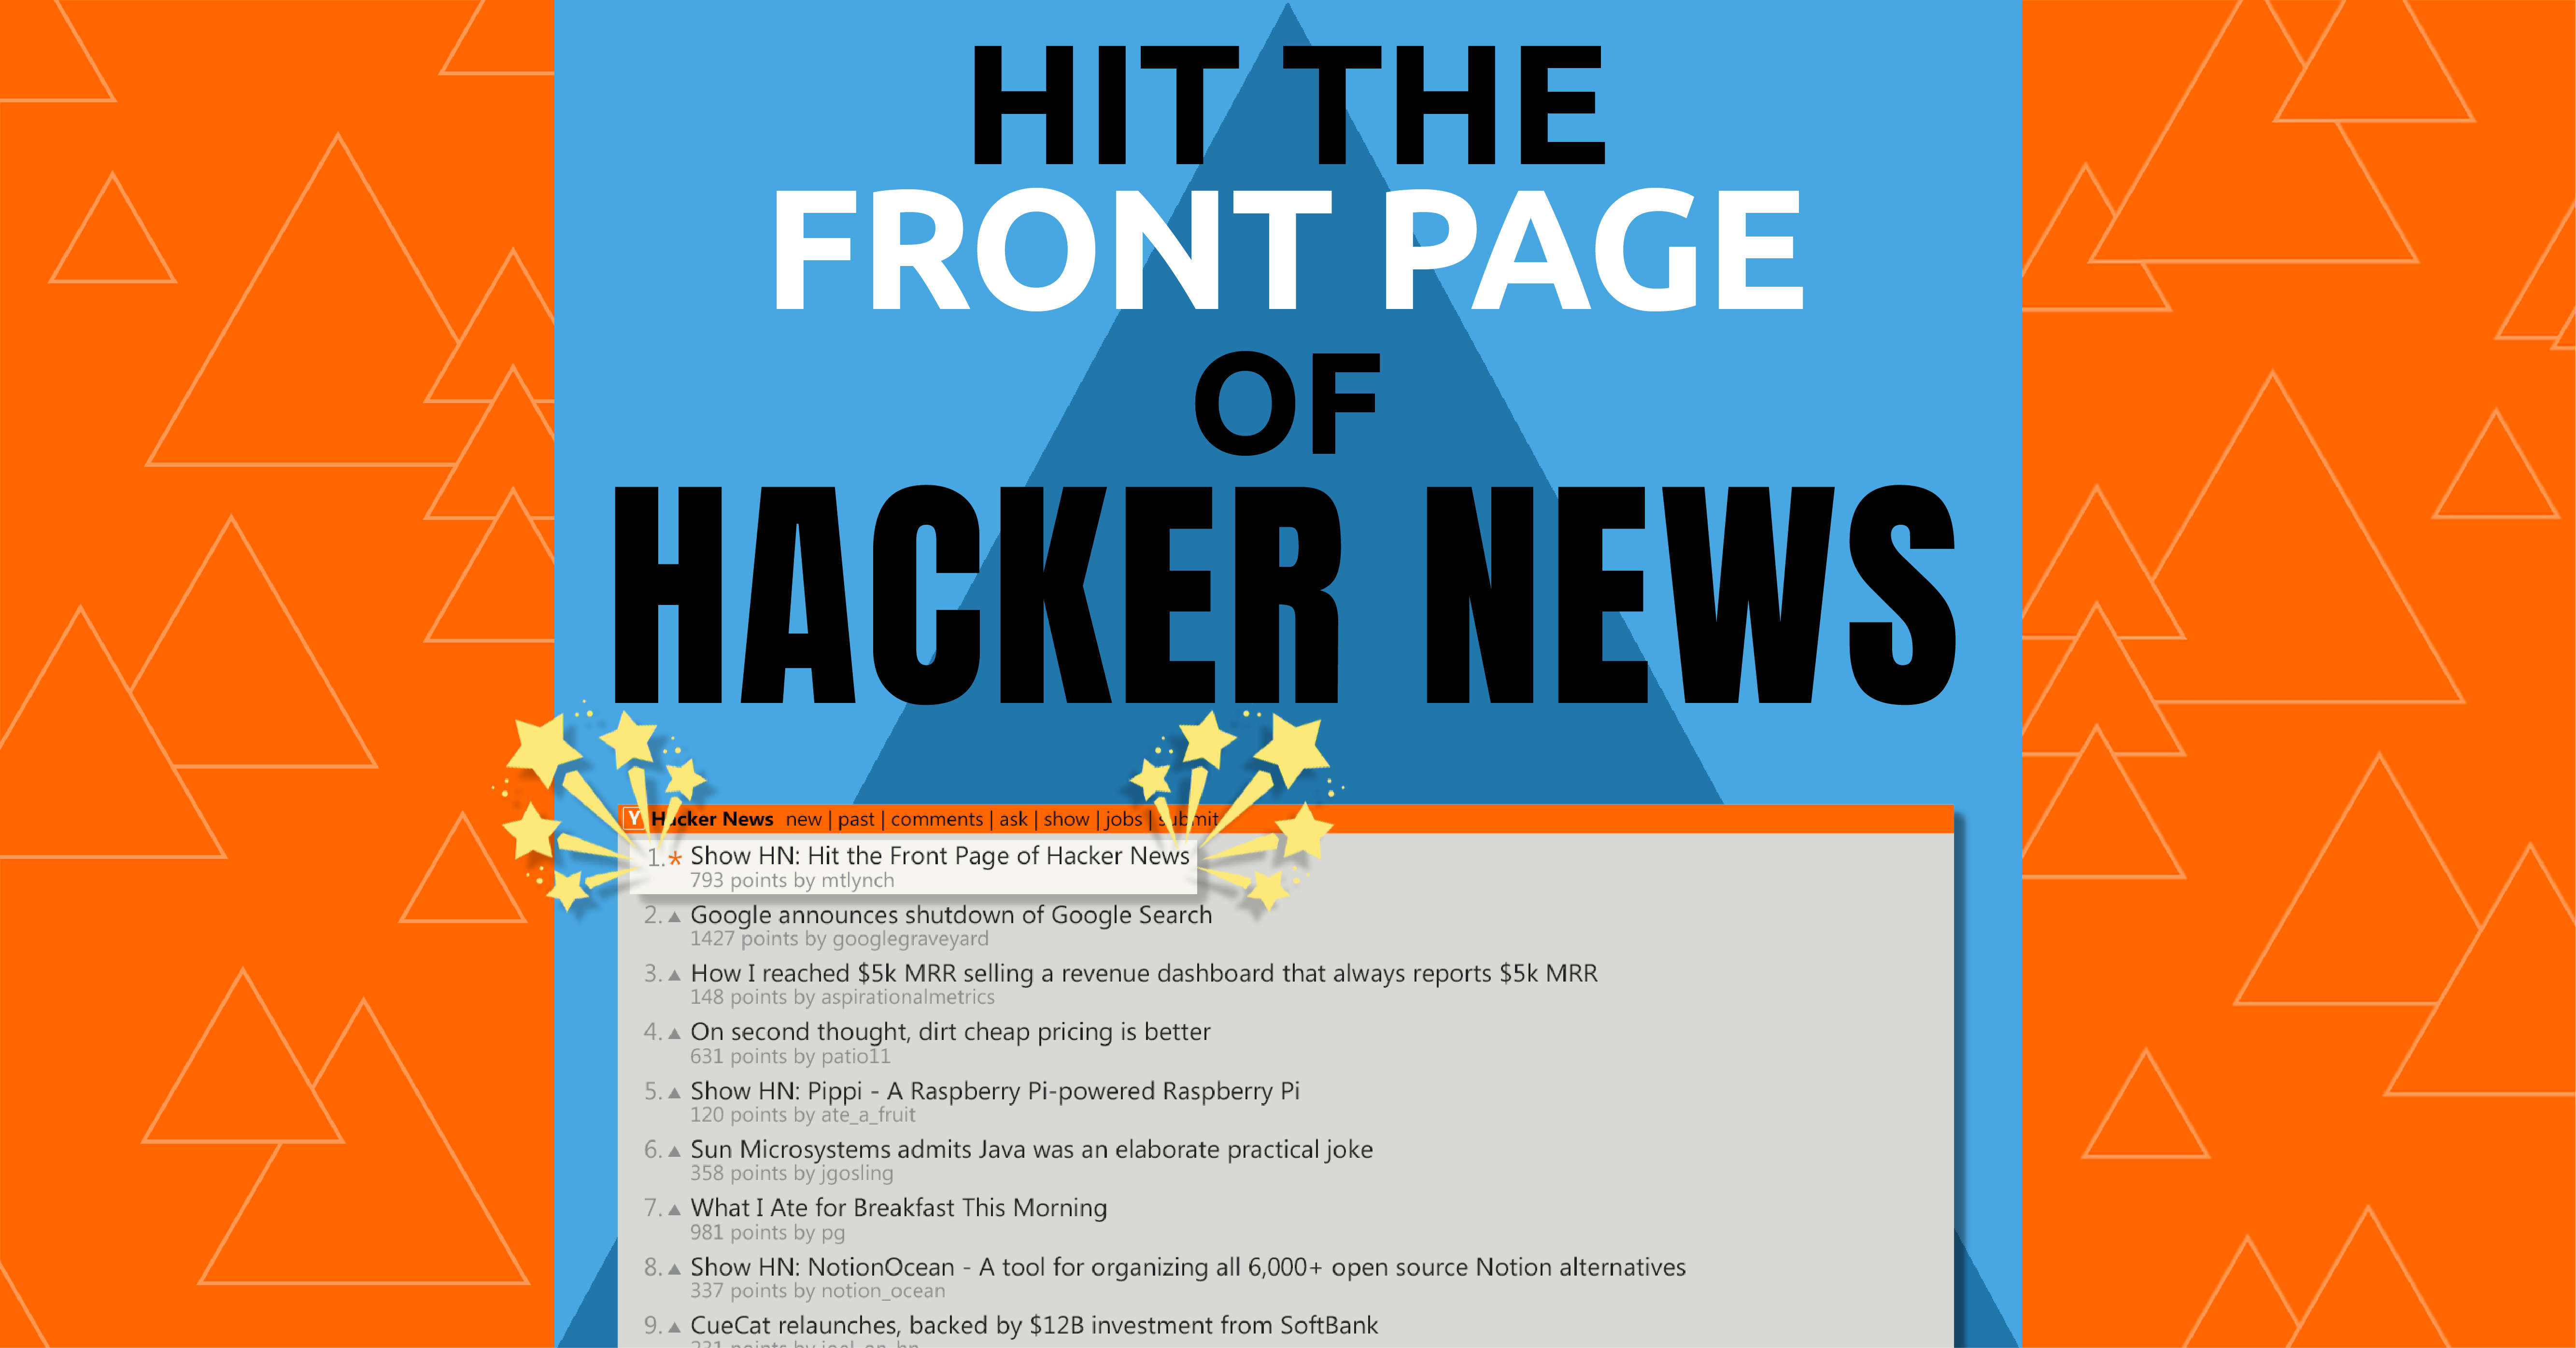

##### **Table of Contents**




>[Introduction](#scrollTo=b2b_WugAQd8B)

>[Dataset](#scrollTo=b2b_WugAQd8B)

>[Project Objectives](#scrollTo=b2b_WugAQd8B)

>[Importing Libraries](#scrollTo=COYFu6tGVfk1)

>[Importing the dataset](#scrollTo=yf1FBu2qNH0n)

>[Extracting Ask HN and  SHOW HN Posts](#scrollTo=G36ljkDNbJWS)

>[Exploring the Number, Avg Number of Comments in ASK HN and SHOW HN posts](#scrollTo=tjgzeVK7OfHh)

>[Analysis of ASK HN and SHOW HN Comments](#scrollTo=WOZwVyYXhGQt)

>[Number of Ask HN Comments by Hour](#scrollTo=kEIOBX3qr4FX)

>[Average number of ASK HN comments by Hour](#scrollTo=-uEDuB5h-50_)

>[Number of SHOW HN Comments by Hour](#scrollTo=3stfbvQoHi6m)

>[Average Number of SHOW HN Comments by Hour](#scrollTo=Pm81AhstJVXn)

>[Analysis of ASK HN and SHOW HN Points](#scrollTo=5PSt98Z_Nws5)

>[Number of ASK HN points by Hour](#scrollTo=hfzyQfcUMQLI)

>[Average Number of ASK HN  points per Hour](#scrollTo=f74jL-7uNOhd)

>[Number of SHOW HN points by Hour](#scrollTo=Gz_B5xk1POaJ)

>[Average Number of SHOW HN points by Hour](#scrollTo=nK1qKDV7TleN)

>[Who are the Top 10 ASK HN Posters?](#scrollTo=vVHijuErposi)

>[Who are the Top 10 SHOW HN Posters?](#scrollTo=h5k_1CIs2KCQ)

>[Predicting the number of comments and points (upvotes) a post will attract.](#scrollTo=9AMl6Qy-sGvM)

>[Predict the Number of Comments](#scrollTo=iR2Hf8WZmz5w)

>[Predicting the Number of Points](#scrollTo=atMfTcwPm-nm)

>[Conclusion](#scrollTo=AhFUeyc4P3fC)



## **Introduction**                                                          

Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

In this project, we'll be analyzing two types of posts. These are posts with titles beginning with **`ASK HN`** and **`SHOW HN`**. 

* **`ASK HN`** posts are created to ask the Hacker News community a specific question.
* **`SHOW HN`** posts are created to show the Hacker News community a project, product, or just something interesting.

##### **Dataset**

Our dataset for this project comprises of Hacker News posts from **Sep 2015 - Sep 2016**. Note that the dataset has been reduced from almost **300,000** rows to approximately **20,000** rows by removing all submissions that didn't receive any comments and then randomly sampling from the remaining submissions. It includes the following columns:

**`title`**: title of the post (self explanatory)

**`url`**: the url of the item being linked to

**`num_points`**: the number of upvotes the post received

**`num_comments`**: the number of comments the post received

**`author`**: the name of the account that made the post

**`created_at`**: the date and time the post was made (the time zone is Eastern Time in the US)


---

##### **Project Objectives**

We will be exploring the following:

1. Which posts receive more comments on average?
2. Do posts created at a certain time receive more comments on average?
3. Which posts receive more points(upvotes) on average?
4. At what time do posts receive more points on average?
5. Who are the Top 10 ASK HN posters?
6. Who are the Top 10 SHOW HN posters?
7. Predict the number of comments and points(upvotes) that a post will attract










##### **Importing Libraries**

To explore and manipulate the dataset, perform relevant data analysis, visualisations and machine learning operations, we would need to import a couple of libraries and modules.



In [ ]:
#Data Extraction & Manipulation Libraries
import pandas as pd
import itertools

#Date & Time Manipulation Module
import datetime as dt

#Data Visualisation Libraries
import plotly.graph_objects as go
from IPython.display import Image
import plotly.offline as pyo
import plotly.express as px
from plotly.subplots import make_subplots

#Machine Learning Libraries
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#function to enable Plotly display offline
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=True)

##### **Importing the dataset**

In [ ]:
posts = pd.read_csv("hacker_news.csv")

#converting our dataset to a list
posts_data = posts.values.tolist()                        
posts_data[:3]

[[12224879,
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  386,
  52,
  'ne0phyte',
  '8/4/2016 11:52'],
 [10975351,
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  39,
  10,
  'josep2',
  '1/26/2016 19:30'],
 [11964716,
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  2,
  1,
  'vezycash',
  '6/23/2016 22:20']]

In [ ]:
#Exploring the number of rows and columns** 
posts.shape

(20100, 7)

We have **20100** rows and **7** columns in the Hacker News Posts Dataset. 

##### **Extracting `Ask HN`** and  **`SHOW HN`** **Posts**

Since the focus of this project is the `ASK HN` and `SHOW HN`, we are going to extract both posts from our dataset.


In [ ]:
ask_posts = []
show_posts = []
other_posts = []

for row in posts_data:
  title = row[1]
  if title.lower().startswith('ask hn'): 
    ask_posts.append(row)
  elif title.lower().startswith('show hn'):
    show_posts.append(row)
  else:
    other_posts.append(row)

In [ ]:
print('No of Ask HN posts:',len(ask_posts))
print('No of SHOW HN posts:',len(show_posts))
print('No of other posts:',len(other_posts))

No of Ask HN posts: 1744
No of SHOW HN posts: 1162
No of other posts: 17194


There are more **`ASK HN`**  posts than **`SHOW HN`** 
posts in our dataset. The number of **`Other Posts`** far exceeds **`ASK HN`** and **`SHOW HN`** posts combined. This shows that users of the Hacker News Post platform are might be more interested in other types of posts.

##### **Exploring the Number, Avg Number of Comments in `ASK HN` and `SHOW HN` posts**


To achieve the set objectives of the datset, we will start by exploring the number of comments and average number of comments in the `ASK HN` and `SHOW HN` posts. We will be working with three functions to avoid unnecessary code repetition. 

1. `comments_per_hour` function: This function will accept `ASK HN` and `SHOW HN` posts, extract the comments by hour,including average comments by hours into a sorted  dataframe.
2. `points_per_hour` function: This function will accept `ASK HN` and `SHOW HN` posts, extract the points by hour,including average points by hours into a sorted  dataframe.
3. `visual` function: This function will be used to visualise our sorted dataframes using a Plotly line graph.

* `comment_per_hour` Function

In [ ]:
#Defining the first function, comments_per_hour

def comments_per_hour(dataset, h_col, c_col):
  
  #h_col: The hour column
  #c_col: The Comment column

  #Comments by Hour
  result_list = []

  for comment in dataset:
      result_list.append([comment[h_col],int(comment[c_col])])

  counts_by_hour = {}
  comments_by_hour = {}

  date_format = '%m/%d/%Y %H:%M'

  for row in result_list:
    date = row[0]
    comment = row[1]
    hour = dt.datetime.strptime(date,date_format).strftime('%H')
    if hour in counts_by_hour:
      comments_by_hour[hour]+=comment
      counts_by_hour[hour]+=1
    else:
      comments_by_hour[hour]=comment
      counts_by_hour[hour]=1
  
  #Average comments by Hour
  avg_by_hour = []

  for row in comments_by_hour:
    avg_by_hour.append([row,round(comments_by_hour[row]/counts_by_hour[row],0)])

  avg_by_hour = dict(avg_by_hour)

  #Sorting the keys in ascending order
  sorted_comments = dict(sorted(comments_by_hour.items()))
  sorted_avg = dict(sorted(avg_by_hour.items()))

  #Convert dictionary to a dataframe
  sorted_comments = pd.DataFrame(list(sorted_comments.items()),columns=['Hour','Comments'])
  sorted_avg = pd.DataFrame(list(sorted_avg.items()),columns=['Hour','Comments'])

  return sorted_comments,sorted_avg

* `points_per_hour` Function

In [ ]:
#Defining the second function, points_per_hour

def points_per_hour(dataset, h_col, p_col):
  
  #h_col: The hour column
  #p_col: The point column

  #Comments by Hour
  point_list = []

  for points in dataset:
      point_list.append([points[h_col],int(points[p_col])])

  counts_by_hour = {}
  points_by_hour = {}

  date_format = '%m/%d/%Y %H:%M'

  for row in point_list:
    date = row[0]
    points = row[1]
    hour = dt.datetime.strptime(date,date_format).strftime('%H')
    if hour in counts_by_hour:
      points_by_hour[hour]+=points
      counts_by_hour[hour]+=1
    else:
      points_by_hour[hour]=points
      counts_by_hour[hour]=1
    
  #Average comments by Hour
  avg_by_hour = []

  for row in points_by_hour:
    avg_by_hour.append([row,round(points_by_hour[row]/counts_by_hour[row],0)])

  avg_by_hour = dict(avg_by_hour)

  #Sorting the keys in ascending order
  sorted_points = dict(sorted(points_by_hour.items()))
  sorted_avg = dict(sorted(avg_by_hour.items()))

  #Convert dictionary to a dataframe
  sorted_points = pd.DataFrame(list(sorted_points.items()),columns=['Hour','Points'])
  sorted_avg = pd.DataFrame(list(sorted_avg.items()),columns=['Hour','Points'])

  return sorted_points,sorted_avg

* `visual` Function

In [ ]:
#Defining the third function, visual

def visual(dataset, heading, post_type_str):

  #Set notebook mode to work in offline
  enable_plotly_in_cell()
  
  #Data Visualisation using Plotly
  fig = go.Figure(data=go.Scatter(x=dataset.Hour, y=dataset[post_type_str], mode="lines+markers+text",line_shape = 'spline',
                       text=dataset[post_type_str],textposition="top center"))

  
  fig.update_layout(showlegend=False,height=500,uniformtext_minsize=6,title =(heading))
  fig.show()
  fig.write_image("figure.png", engine="kaleido")

  

##### Analysis of **`ASK HN`** and **`SHOW HN`** Comments 

In [ ]:
# Total and Average ASK HN and SHOW HN comments
total_ask_comments = 0
total_show_comments = 0

for comment in ask_posts:
  total_ask_comments += int(comment[4])

for comment in show_posts:
  total_show_comments += int(comment[4])

avg_ask_comments = total_ask_comments/len(ask_posts)
avg_show_comments = total_show_comments/len(show_posts)

print('There are',total_ask_comments,'ASK HN comments')
print('Average number of ASK HN comments:',round(avg_ask_comments,1))
print('\n')
print('There are',total_show_comments,'SHOW HN comments')
print('Average number of SHOW HN comments:',round(avg_show_comments,1))


There are 24483 ASK HN comments
Average number of ASK HN comments: 14.0


There are 11988 SHOW HN comments
Average number of SHOW HN comments: 10.3


Unsuprisingly, there are more **`ASK HN`** comments than **`SHOW HN`** comments. Also, The average number of **`ASK HN`** comments are more than **`SHOW HN`** comments. We can deduce that ASK HN posts receive more comments than SHOW HN posts.

##### **Number of `Ask HN` Comments by Hour**







In [ ]:
ask_comments_hours, avg_ask_comments_hrs = comments_per_hour(ask_posts,6,4)

#Data Visualisation
visual(ask_comments_hours,("Number of ASK HN Comments per Hour"),'Comments')

`ASK HN` posts received the most comments when posted at **3 pm (4477 comments)**. This is followed by posts published at **4pm, 9pm, 8pm and 6pm**. Posts published between **10pm to 9am** received lower apart from the **2am** posts. **9am** posts receive the lowest comments. From this analysis, we can deduce that `ASK HN` posts will receive more comments in the evening hours compared to the morning hours.

##### **Average number of `ASK HN` comments by Hour**

In [ ]:
ask_comments_hours, avg_ask_comments_hrs = comments_per_hour(ask_posts,6,4)

#Data Visualisation
visual(avg_ask_comments_hrs,("Average Number of ASK HN Posts per Hour"),'Comments')

`ASK HN` posts published at **3pm** still received the highest average comments (**39**), followed by posts at **2am (24), 8pm (22), 4pm (17) and 9pm (16)**. Posts published at **9am** still received the lowest average comments. 

##### **Number of `SHOW HN` Comments by Hour**

To explore the `SHOW HN` posts, we will be using the earlier `points_per_hour` function.


In [ ]:
show_comments_hours, avg_show_comments_hrs = comments_per_hour(show_posts,6,4)

#Data Visualisation
visual(show_comments_hours,("Number of SHOW HN Posts per Hour"),'Comments')

`SHOW HN` posts received the most comments when posted at **2 pm (1156 comments)**. This is closely followed by posts published at **4pm (1084), 6pm(962), 1pm(946) and 5pm(911)**. **5am** posts received the lowest comments. 

##### **Average Number of `SHOW HN` Comments by Hour**

In [ ]:
show_comments_hours, avg_show_comments_hrs = comments_per_hour(show_posts,6,4)

#Data Visualisation
visual(avg_show_comments_hrs,("Average Number of SHOW HN Posts per Hour"),'Comments')

Although posts published at **2pm** received the highest comments. `SHOW HN` posts published at **12 midnight** received the highest average comments (**16**), followed by posts at **6pm (16), 2pm (13), 7am (12) and 10pm (12)**. Posts published at **5am** still received the lowest average comments.







##### Analysis of **`ASK HN`** and **`SHOW HN`** Points 

In [ ]:
# Average ASK HN comments
# Average SHOW HN comments


total_ask_points = 0
total_show_points = 0

for points in ask_posts:
  total_ask_points += int(points[3])

for points in show_posts: 
  total_show_points += int(points[3])

avg_ask_points = total_ask_points/len(ask_posts)
avg_show_points = total_show_points/len(show_posts)


print('There are',total_ask_points,'ASK HN points')
print('Average number of ASK HN points:',round(avg_ask_points,1))
print('\n')   
print('There are',total_show_points,'SHOW HN points')
print('Average number of SHOW HN points:',round(avg_show_points,1))

There are 26268 ASK HN points
Average number of ASK HN points: 15.1


There are 32019 SHOW HN points
Average number of SHOW HN points: 27.6



* The number of **`SHOW HN`** points is more than the number of **`ASK HN`** points. 
* The average number of **`SHOW HN`** points is also more than the average number of **`ASK HN`** points.

##### **Number of `ASK HN` points by Hour** 

In [ ]:
#@title
ask_points_hours, avg_ask_points_hrs = points_per_hour(ask_posts,6,3)

#Data Visualisation
visual(ask_points_hours,("Number of ASK HN Points per Hour"),'Points')

`ASK HN` posts received the most points(upvotes) when posted at **3 pm (3479 points)**. This is followed by posts published at **4pm (2522), 1pm(2062), 5pm(1941) and 6pm(1741)**.  **9am** posts receive the lowest points.

##### **Average Number of `ASK HN`  points per Hour**

In [ ]:
ask_points_hours, avg_ask_points_hrs = points_per_hour(ask_posts,6,3)

#Data Visualisation
visual(avg_ask_points_hrs,("Average Number of ASK HN Points per Hour"),'Points')

`ASK HN` posts received the average highest points(upvotes) when posted at **3 pm (30 points)**. This is  followed by posts published at **1pm (24), 4pm(23), 5pm(19) and 10am(19)**. Posts published between **9am, 3am and 10pm** received lowest points. 

##### **Number of `SHOW HN` points by Hour**

In [ ]:
show_points_hours, avg_show_points_hrs = points_per_hour(show_posts,6,3)

#Data Visualisation
visual(show_points_hours,("Number of SHOW HN Points per Hour"),'Points')

 `SHOW HN` posts published at **4pm** received the highest number of points (**2634**), followed closely by posts at **12 noon (2543), 5pm (2521), 1pm (2438) and 3pm (2228)**. Posts published at **5am** received the lowest points**(8)**. 

##### **Average Number of `SHOW HN` points by Hour**

In [ ]:
show_points_hours, avg_show_points_hrs = points_per_hour(show_posts,6,3)

#Data Visualisation
visual(avg_show_points_hrs,("Average Number of SHOW HN Points per Hour"),'Points')

`SHOW HN` posts received the highest average number of points(upvotes) when posted at **12 noon (42 points)  and 11pm(42 points)**. This is followed by posts published at **10pm(40 points)** and **12 midnight(38 points)** and **6pm(36 points)**. **5am** posts still received the lowest average points.

##### **Who are the Top 10 ASK HN Posters?**







In [ ]:
enable_plotly_in_cell()

ask_author_list = []


for row in ask_posts:
  ask_author_list.append(row[5])

ask_authors ={}
for row in ask_author_list:
  if row in ask_authors:
    ask_authors[row]+=1
  else:
    ask_authors[row]=1


#Sorting the number of comments in descending order
sorted_ask_authors = dict( sorted(ask_authors.items(),key=lambda item: item[1],reverse=True))

#Selecting the Top 10 ASK HN Posters
sorted_ask_authors = dict(itertools.islice(sorted_ask_authors.items(), 10))
sorted_ask_authors = pd.DataFrame(list(sorted_ask_authors.items()),columns=['Author','Comments'])

fig = px.bar(sorted_ask_authors, y='Comments', x='Author', text_auto='.2s',
            title="Top 10 ASK HN Posters")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
fig.write_image("figure.png", engine="kaleido")


`hoodoof` is the highest ASK HN poster with **16** `ASK HN` posts followed by **tmaly(14), whoishiring(9)** and the others.

##### **Who are the Top 10 SHOW HN Posters?**





In [ ]:

enable_plotly_in_cell()

show_author_list = []


for row in show_posts:
  show_author_list.append(row[5])

show_authors ={}
for row in show_author_list:
  if row in show_authors:
    show_authors[row]+=1
  else:
    show_authors[row]=1


#Sorting the number of comments in descending order
sorted_show_authors = dict( sorted(show_authors.items(),key=lambda item: item[1],reverse=True))

#Selecting the Top 10 ASK HN Posters
sorted_show_authors = dict(itertools.islice(sorted_show_authors.items(), 10))
sorted_show_authors = pd.DataFrame(list(sorted_show_authors.items()),columns=['Author','Comments'])

fig = px.bar(sorted_show_authors, y='Comments', x='Author', text_auto='.2s',
            title="Top 10 SHOW HN Posters")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
fig.write_image("figure.png", engine="kaleido")



There are **7** users who are share the topmost `SHOW HN` title. Each of these users have 4 posts. This is followed by **3** other users with 3 posts each.

##### **Predicting the number of comments and points (upvotes) a post will attract.**












In [ ]:
#Create a list of ASK HN & SHOW HN Posts

ask_show_posts = []

for row in posts_data:
  title = row[1]
  if title.lower().startswith('ask hn'): 
    ask_show_posts.append(row)
  elif title.lower().startswith('show hn'):
    ask_show_posts.append(row)
  else:
    other_posts.append(row)

print('No of Ask & SHOW HN posts:',len(ask_show_posts))

No of Ask & SHOW HN posts: 2906


In [ ]:
#Extracting "ASK HN" & "SHOW HN" Strings, Comments, Points and Hour

new_data = []
date_format = '%m/%d/%Y %H:%M'
for row in ask_show_posts:
  title = row[1][0:8]
  comments = row[3]
  points = row[4]
  hour = dt.datetime.strptime(row[6],date_format).strftime('%H')
  new_data.append([title,comments,points,hour])

new_data[:5]

[['Ask HN: ', 2, 6, '09'],
 ['Show HN:', 26, 22, '14'],
 ['Ask HN: ', 28, 29, '13'],
 ['Ask HN: ', 1, 1, '10'],
 ['Ask HN: ', 1, 3, '14']]

In [ ]:
#Converting the 'new_data' list to Dataframe

df = pd.DataFrame(new_data,columns=['Title','Comments','Points','Hour'])

Before inputting my dataframe in the Linear Regression model, I need transform all object columns to numerical values. The Linear Regression model does work well NOT with text values. I can convert text columns to numbers using Label Encoders but first I need to examine the values of the `Title` column.

In [ ]:
#Before Label encoding the title columns, I evaluate the values of the column
df.Title.value_counts()

Ask HN:     1736
Show HN:    1161
Ask HNs:       2
ASK HN:        2
Ask HN S       1
SHOW HN:       1
Ask HN :       1
Ask HN M       1
Ask HN;        1
Name: Title, dtype: int64

There are multiple versions of Ask HN and Show HN. I will be replacing the values in the `Title` Column until I have only two unique values: `Ask HN` and `Show HN`.

In [ ]:
#Replacing values in the Title Column

df['Title'] = df['Title'].replace(['Show HN:','SHOW HN:','Show HN '], 'Show HN')

df['Title'] = df['Title'].replace(['Ask HN:','Ask HNs:','Ask HN :','Ask HN M','Ask HN S',
                                  'ASK HN: ','Ask HN; ','Ask HN: '], 'Ask HN')

df.Title.value_counts()

Ask HN     1744
Show HN    1162
Name: Title, dtype: int64

In [ ]:
#Label encoding the Title Column 
label = LabelEncoder()
df['Title'] = label.fit_transform(df['Title'])
df.sample(3)

,Title,Comments,Points,Hour
758,1,1,1,15
1941,0,2,1,14
2702,1,4,2,07


In [ ]:
#Show HN is now labelled as 1 while Ask HN is labelled as 0


##### **Predict the Number of Comments**



In [ ]:
#Creating a Linear Regression Model to predict number of comments

reg_comments = linear_model.LinearRegression()
reg_comments.fit(df[['Title','Hour']],df.Comments)

LinearRegression()

In [ ]:
reg_comments.score(df[['Title','Hour']],df.Comments)*100

1.1858804364322073

The Linear Regression Model has an accuracy score of **1.1%**.

**a**. Predict the Number of Comments for an **`Ask HN`** Post at **10 am**




In [ ]:
reg_comments.predict([[0,10]])

array([13.87842326])

The model predicted **13** comments for a **10am** **`ASK HN`** post which is the actual average number of comments that an **`ASK HN`** **10am** post will receive based on our dataset.

**b**. Predicting the number of comments for a **`SHOW HN`** post at **3pm**


In [ ]:
reg_comments.predict([[1,15]])

array([28.12038635])

The model predicted **28** comments for a **3pm** **`SHOW HN`** post while the expected average number of comments is **8**.



 ##### **Predicting the Number of Points**

In [ ]:
reg_points = linear_model.LinearRegression()
reg_points.fit(df[['Title','Hour']],df.Points)

LinearRegression()

In [ ]:
reg_points.score(df[['Title','Hour']],df.Points)*100

0.22286632393777595

The Linear Regression Model has an accuracy score of **0.2%**.



**a**. Predicting the number of points for an **`ASK HN`** post at **1pm**

In [ ]:
reg_points.predict([[0,13]])

array([14.01115207])

The model predicted **14** points for a **1pm** **`ASK HN`** post while the expected average number of points is **24**.



**b.**Predicting the number of points for a **`SHOW HN`** post at **9pm**

In [ ]:
reg_points.predict([[1,21]])

array([11.44468294])

The model predicted **11** points for a **9pm** **`SHOW HN`** post while the expected average number of comments is **18**.



##### **Conclusion**

* On average, The `ASK HN` posts received more comments than the `SHOW HN` posts but the `SHOW HN` posts do receive more points than the `ASK HN` points.

* The best times to publish an `ASK HN` posts is between `1pm` and `9pm`. Although 2am posts also show some promise. However, the best hour to make an `ASK HN` posts is 3pm. `SHOW HN` posts are best published between `1pm` and `6pm`. The best hour to do a `SHOW HN` that is likely to generate a lot of comments is at `2pm`.

* Regarding points(upvotes), `ASK HN` points follow the same trend with `ASK HN` comments. If a Hanker Rank user wants both points and comments, the best time to do so is 3pm. `SHOW HN` posts are likely to receive more points when posted between `11am` and `12 midnight`. However, the best hour to do s `SHOW HN` post is `4pm`.

* The top `ASK HN` posters are `hoodoof`,`tmaly` and `whoishiring`. The top `SHOW HN` posters are `vipul4vb`,`alexellisuk` and `max0563.`

* The Linear Regression Model performs poorly with predicting the number of comments and points(upvotes) that an `ASK HN` or `SHOW HN` post will receive. The accuracy scores are all under 2%. It would be great to further explore machine learning algorithms with higher accuracy rates.

* Although timing is an important factor for publishing content on the Hacker Rank, others factors such as content of post etc should also be considered.



